In [1]:
#dependencies
import pandas as pd
import seaborn as sns
import sqlite3
from sqlite3 import Error
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
#create the pandas data frame
wine_df = pd.read_csv('/Users/nico_marais/code/Liedjieboer/forward_farming_big_datasets/winemag-data-130k-v2.csv')
#display the top 3 records from the data frame
wine_df.head(3)

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [27]:
#inline function to produce word count, splitting on spaces
wine_df['word_count'] = wine_df['description'].apply(lambda x: len(str(x).split(" ")))
wine_df.word_count.describe()

count    129971.000000
mean         40.384440
std          11.113601
min           3.000000
25%          33.000000
50%          39.000000
75%          47.000000
max         135.000000
Name: word_count, dtype: float64

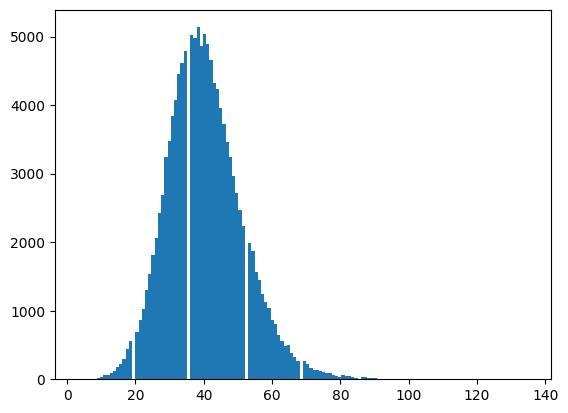

In [28]:
#set x for the histogram and set bins based on max
x = wine_df['word_count']
n_bins = 140
#plot histogram
plt.hist(x, bins=n_bins)
plt.show()

In [29]:
stop_words = set(stopwords.words("english"))
#show how many words are in the list of stop words
print(len(stop_words))
#179

179


In [32]:
#loops through descriptions and cleans them
clean_desc = []
for w in range(len(wine_df.description)):
    desc = wine_df['description'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
#assign the cleaned descriptions to the data frame
wine_df['clean_desc'] = clean_desc

In [35]:
wine_df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,word_count,clean_desc
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,24,aromas include tropical fruit broom brimstone ...
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,39,this is ripe and fruity a wine that is smooth ...
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,28,tart and snappy the flavors of lime flesh and ...
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,33,pineapple rind lemon pith and orange blossom s...
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,41,much like the regular bottling from this comes...


In [20]:
stem_desc = []
for w in range(len(wine_df['clean_desc'])):
    split_text = wine_df['clean_desc'][w].split()

In [21]:
dict_df = pd.DataFrame(columns = ['lead', 'follow', 'freq'])
dict_df['lead']=split_text
follow = split_text[1:]
follow.append('EndWord')
follow

['rich',
 'and',
 'off',
 'dry',
 'this',
 'is',
 'powered',
 'by',
 'intense',
 'spiciness',
 'and',
 'rounded',
 'texture',
 'lychees',
 'dominate',
 'the',
 'fruit',
 'profile',
 'giving',
 'an',
 'opulent',
 'feel',
 'to',
 'the',
 'aftertaste',
 'drink',
 'now',
 'EndWord']

In [22]:
end_words = []
for word in split_text:
    if word[-1] in ['.','!','?'] and word != '.':
        end_words.append(word)
print(end_words)

[]
